# Heart Disease Status Prediction Model

# Importing Libraries 

In [1]:
from __future__ import print_function
import pandas as pd # For data analysis
import numpy as np # For linear algebra

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Import various algorithms building
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Import libraries for model evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the Dataset(s) 

In [2]:
N_data = pd.read_csv("data/northern_heart_diease_data.csv")

In [3]:
N_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172,no,1.4,upsloping,0.0,normal,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264,False,0,132,no,1.2,flat,0.0,reversable defect,present
299,68.0,male,asymptomatic,144.0,193,True,0,141,no,3.4,flat,2.0,reversable defect,present
300,57.0,male,asymptomatic,130.0,131,False,0,115,yes,1.2,flat,1.0,reversable defect,present
301,57.0,female,atypical angina,130.0,236,False,2,174,no,0.0,flat,1.0,normal,present


In [4]:
N_data['age'].isna().sum()

2

In [5]:
N_data['age'].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., nan, 61., 65.,
       71., 51., 46., 45., 68., 47., 34., 39., 35., 55., 29., 70., 77.,
       38., 74., 76.])

In [6]:
N_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,True,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,False,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,False,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,False,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,False,2,172,no,1.4,upsloping,0.0,normal,absent


In [7]:
N_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
298,45.0,male,typical angina,110.0,264,False,0,132,no,1.2,flat,0.0,reversable defect,present
299,68.0,male,asymptomatic,144.0,193,True,0,141,no,3.4,flat,2.0,reversable defect,present
300,57.0,male,asymptomatic,130.0,131,False,0,115,yes,1.2,flat,1.0,reversable defect,present
301,57.0,female,atypical angina,130.0,236,False,2,174,no,0.0,flat,1.0,normal,present
302,38.0,male,non-anginal pain,138.0,175,False,0,173,no,0.0,upsloping,NaN,normal,absent


In [8]:
S_data = pd.read_csv("data/southern_heart_disease_data.csv")

In [9]:
S_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present,NaN,NaN
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent,NaN,NaN
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present,NaN,NaN
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent,NaN,NaN
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,male,non-anginal pain,172,199,yes,0,162.0,False,0.5,upsloping,0,reversable defect,absent,NaN,NaN
266,44.0,male,atypical angina,120,263,no,0,173.0,False,0.0,upsloping,0,reversable defect,absent,NaN,NaN
267,56.0,female,atypical angina,140,294,no,2,153.0,False,1.3,flat,0,normal,absent,NaN,NaN
268,57.0,male,asymptomatic,140,192,no,0,148.0,False,0.4,flat,0,fixed defect,absent,NaN,NaN


In [10]:
S_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present,NaN,NaN
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent,NaN,NaN
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present,NaN,NaN
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent,NaN,NaN
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent,NaN,NaN


In [11]:
S_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
265,52.0,male,non-anginal pain,172,199,yes,0,162.0,False,0.5,upsloping,0,reversable defect,absent,NaN,NaN
266,44.0,male,atypical angina,120,263,no,0,173.0,False,0.0,upsloping,0,reversable defect,absent,NaN,NaN
267,56.0,female,atypical angina,140,294,no,2,153.0,False,1.3,flat,0,normal,absent,NaN,NaN
268,57.0,male,asymptomatic,140,192,no,0,148.0,False,0.4,flat,0,fixed defect,absent,NaN,NaN
269,67.0,male,asymptomatic,160,286,no,2,108.0,True,1.5,flat,3,normal,present,NaN,NaN


In [12]:
S_data['age'].isna().sum()

2

In [13]:
# Replace non-NaN representations with NaN in 'age' column
S_data['age'].replace(' ', np.nan, inplace=True)  # Adjust 'NA' to the appropriate representation


In [14]:
N_data['age'].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., nan, 61., 65.,
       71., 51., 46., 45., 68., 47., 34., 39., 35., 55., 29., 70., 77.,
       38., 74., 76.])

In [15]:
S_data['age'].isna().sum()

2

In [16]:
N_data.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol          int64
fbs            bool
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
status       object
dtype: object

In [17]:
S_data.dtypes

age            float64
sex             object
cp              object
trestbps         int64
chol             int64
fbs             object
restecg          int64
thalach        float64
exang             bool
oldpeak        float64
slope           object
ca               int64
thal            object
status          object
Unnamed: 14    float64
Unnamed: 15    float64
dtype: object

# 1. Data Consolidation

## A. Are any transformations required for specific variables to ensure they are directly comparable between the two datasets?

Yes, the following transformations are required to ensure they are directly comparable between the two datasets:

1. In the northern dataset, the 'fbs' column is represented as "True" and "False" while the southern datset uses 
"Yes" and "No" in the same column;

2. The 'exang' column in the northern dataset "Yes" and "No" while the southern dataset has "False" and "True"; 

3. The southern dataset has two erroneuosly unnamed columns without any values therein across all the rows;

4. The "trestbps" and "ca" columns in the northern datset are erroneously given float data type while those in the southern dataset are rightly assigned to be integer data type;

These inconsistencies needs to be harmonized.

## Harmonizing the inconsistencies 

### No. 1: Rerepresentation of the "fbs" column in the northern datset

In [18]:
# Changing the categorical variables of the "fbs" column in the northern datset from "False" and "True" to  "Yes" and "No" 
# to correspond with the southern dataset  

# Define the mapping dictionary
mapping = {True: 'Yes', False: 'No'} 

# Apply the mapping to the specified column
N_data['fbs'] = N_data['fbs'].replace(mapping)


In [19]:
N_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,Yes,2,150,no,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,No,2,108,yes,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,No,2,129,yes,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,No,0,187,no,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,No,2,172,no,1.4,upsloping,0.0,normal,absent


### No. 2: Rerepresentation of the "exang" column in the northern datset

In [20]:
# Changing the categorical variables of the "exang" column in the northern datset from "Yes" and "No" to "True" and "False"
# to correspond with the southern dataset  

# Define the mapping dictionary
mapping = {'yes': 'True', 'no': 'False'} 

# Apply the mapping to the specified column
N_data['exang'] = N_data['exang'].replace(mapping)

In [21]:
N_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145.0,233,Yes,2,150,False,2.3,downsloping,0.0,fixed defect,absent
1,67.0,male,asymptomatic,160.0,286,No,2,108,True,1.5,flat,3.0,normal,present
2,67.0,male,asymptomatic,120.0,229,No,2,129,True,2.6,flat,2.0,reversable defect,present
3,37.0,male,non-anginal pain,130.0,250,No,0,187,False,3.5,downsloping,0.0,normal,absent
4,41.0,female,atypical angina,130.0,204,No,2,172,False,1.4,upsloping,0.0,normal,absent


### No. 3: Dropping the unnamed columns in the southern datset without values across all rows

In [22]:
S_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status,Unnamed: 14,Unnamed: 15
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present,NaN,NaN
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent,NaN,NaN
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present,NaN,NaN
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent,NaN,NaN
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,male,non-anginal pain,172,199,yes,0,162.0,False,0.5,upsloping,0,reversable defect,absent,NaN,NaN
266,44.0,male,atypical angina,120,263,no,0,173.0,False,0.0,upsloping,0,reversable defect,absent,NaN,NaN
267,56.0,female,atypical angina,140,294,no,2,153.0,False,1.3,flat,0,normal,absent,NaN,NaN
268,57.0,male,asymptomatic,140,192,no,0,148.0,False,0.4,flat,0,fixed defect,absent,NaN,NaN


In [23]:
# Dropping the unnamed columns in the southern datset without values across all rows in the dataset
S_data.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True) 

In [24]:
S_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,70.0,male,asymptomatic,130,322,no,2,109.0,False,2.4,flat,3,normal,present
1,67.0,female,non-anginal pain,115,564,no,2,160.0,False,1.6,flat,0,reversable defect,absent
2,57.0,male,atypical angina,124,261,no,0,141.0,False,0.3,upsloping,0,reversable defect,present
3,64.0,male,asymptomatic,128,263,no,0,105.0,True,0.2,flat,1,reversable defect,absent
4,74.0,female,atypical angina,120,269,no,2,121.0,True,0.2,upsloping,1,normal,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,male,non-anginal pain,172,199,yes,0,162.0,False,0.5,upsloping,0,reversable defect,absent
266,44.0,male,atypical angina,120,263,no,0,173.0,False,0.0,upsloping,0,reversable defect,absent
267,56.0,female,atypical angina,140,294,no,2,153.0,False,1.3,flat,0,normal,absent
268,57.0,male,asymptomatic,140,192,no,0,148.0,False,0.4,flat,0,fixed defect,absent


### No. 4: Changing the data types of the "thalach", "trestbps" and "ca" columns to the appropriate data types 

In [25]:
# Checking for missing values in the trestbps column in the northern dataset 
N_data.trestbps.isna().sum()

1

In [26]:
N_data.fillna(N_data.mean(), inplace=True) # Imputing the missing value using the mean

In [27]:
# Checking again for missing values in the trestbps column in the northern dataset 
N_data.trestbps.isna().sum()

0

In [28]:
# Changing the data type of the "trestbps" column in the northern dataset from float to the supposed intiger data type
N_data['trestbps'] = N_data['trestbps'].astype('int64')

In [29]:
N_data.dtypes 

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
status       object
dtype: object

In [30]:
# Checking for missing values in the ""thalach"" column in the southern dataset 
N_data.thalach.isna().sum()

0

In [31]:
# Changing the data type of the thalach column in the southern dataset from float to the supposed intiger data type
N_data['thalach'] = N_data['thalach'].astype('int64')

In [32]:
N_data.dtypes 

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
status       object
dtype: object

In [33]:
# Checking for missing values in the ""ca"" column in the northern dataset 
N_data.ca.isna().sum()

0

In [34]:
# Changing the data type of the "ca" column in the southern dataset from float to the supposed intiger data type
N_data['ca'] = N_data['ca'].astype('int64')

In [35]:
N_data.dtypes 

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
status       object
dtype: object

## B. How will these transformations affect the analysis?

These transformations can affect the analysis in several ways:

1. Consistency in Representation: Standardizing the representation of categorical variables (e.g., 'fbs' and 'exang') across the two datasets ensures consistency in interpretation. It reduces ambiguity and facilitates easier comparison and integration of data from the two datasets.

2. Data Type Consistency: Ensuring consistency in data types (e.g., integer for 'trestbps' and 'ca') across the two datasets helps maintain uniformity and compatibility in analyses. It prevents potential errors or inconsistencies that may arise from mismatched data types.

3. Analysis Interpretation: The choice of representation and data type can impact the interpretation of analysis results. For example, if 'exang' is represented as 'True' and 'False' in one dataset and 'Yes' and 'No' in another, it may affect the interpretation of any analysis involving this variable if not handled consistently.

4. Data Quality and Integrity: Addressing erroneous columns or data type assignments (e.g., unnamed columns, float data type for 'trestbps' and 'ca') improves the overall quality and integrity of the datasets. It reduces the risk of inaccuracies or biases in analysis results caused by data inconsistencies or errors.

5. Comparative Analysis: With consistent representation and data types across the two datasets, comparative analysis becomes more robust and reliable. It enables meaningful comparisons between variables or groups across the datasets, leading to more accurate insights and conclusions.

## C. After consolidating the datasets, what steps will be taken to validate the integrity and accuracy of the combined data?

Here are the key steps that can be taken after consolidation:

1. Check for Duplicates: Look for duplicate records in the combined dataset. Duplicate records may arise due to multiple entries for the same observation in one or both of the original datasets. Identify and resolve any duplicates to ensure each observation is unique.

2. Check Missing Values: Address any missing values that may have resulted from the merging process. Decide on a strategy for handling missing data, such as imputation or deletion, based on the nature of the data and the analysis requirements.

3. Compare Summary Statistics: Compare summary statistics (e.g., means, standard deviations, counts) between the original datasets and the merged dataset. Any significant discrepancies may indicate issues with the merging process or data quality.

4. Examine Data Consistency: Validate the consistency of data across variables and between datasets. For numeric variables, check summary statistics (e.g., mean, median, standard deviation) to ensure they align with expectations. For categorical variables, examine frequency tables to ensure categories are consistent and meaningful.

5. Visualize Relationships: Create visualizations such as scatter plots, histograms, or box plots to examine relationships between variables in the combined dataset. Visual inspection can help identify outliers, patterns, or unexpected trends that may require further investigation.

6. Consult Subject Matter Experts: Seek input from domain experts or stakeholders who are familiar with the data to validate the integrity and accuracy of the combined dataset. Their insights can help identify potential issues or inconsistencies that may have been overlooked.

### Consolidated dataset 

In [36]:
combined_data = pd.concat([N_data, S_data], axis=0)


In [37]:
combined_data   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,male,typical angina,145,233,Yes,2,150.0,False,2.3,downsloping,0,fixed defect,absent
1,67.0,male,asymptomatic,160,286,No,2,108.0,True,1.5,flat,3,normal,present
2,67.0,male,asymptomatic,120,229,No,2,129.0,True,2.6,flat,2,reversable defect,present
3,37.0,male,non-anginal pain,130,250,No,0,187.0,False,3.5,downsloping,0,normal,absent
4,41.0,female,atypical angina,130,204,No,2,172.0,False,1.4,upsloping,0,normal,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,male,non-anginal pain,172,199,yes,0,162.0,False,0.5,upsloping,0,reversable defect,absent
266,44.0,male,atypical angina,120,263,no,0,173.0,False,0.0,upsloping,0,reversable defect,absent
267,56.0,female,atypical angina,140,294,no,2,153.0,False,1.3,flat,0,normal,absent
268,57.0,male,asymptomatic,140,192,no,0,148.0,False,0.4,flat,0,fixed defect,absent


# 2. Data Cleaning

## Understanding the newly merged data

In [38]:
combined_data.size

8022

In [39]:
combined_data.shape

(573, 14)

In [40]:
combined_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       571 non-null    float64
 1   sex       573 non-null    object 
 2   cp        573 non-null    object 
 3   trestbps  573 non-null    int64  
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    object 
 6   restecg   573 non-null    int64  
 7   thalach   570 non-null    float64
 8   exang     573 non-null    object 
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    object 
 11  ca        573 non-null    int64  
 12  thal      571 non-null    object 
 13  status    573 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ KB


### Checking for duplicated values

In [41]:
combined_data.duplicated().sum() # Number of duplicated values 

0

## A. Are there any missing values in the dataset?   If so, how do you propose to handle them?

### Checking for missing values

In [42]:
combined_data.isna().sum()

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     3
exang       0
oldpeak     0
slope       0
ca          0
thal        2
status      0
dtype: int64

### Handling the missing values 

The missing values are very few and does not contain NaN values, hence, I propose to drop them because they are insignificant to negatively impact the prediction result  

In [43]:

# Dropping rows with missing values without NaN:
combined_data.dropna(inplace=True)

In [44]:
combined_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
status      0
dtype: int64

In [45]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       566 non-null    float64
 1   sex       566 non-null    object 
 2   cp        566 non-null    object 
 3   trestbps  566 non-null    int64  
 4   chol      566 non-null    int64  
 5   fbs       566 non-null    object 
 6   restecg   566 non-null    int64  
 7   thalach   566 non-null    float64
 8   exang     566 non-null    object 
 9   oldpeak   566 non-null    float64
 10  slope     566 non-null    object 
 11  ca        566 non-null    int64  
 12  thal      566 non-null    object 
 13  status    566 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 66.3+ KB


In [46]:
# Changing the data type of the 'age' column in the dataset from float to the supposed integer data type
combined_data['age'] = combined_data['age'].astype('int64')

In [47]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       566 non-null    int64  
 1   sex       566 non-null    object 
 2   cp        566 non-null    object 
 3   trestbps  566 non-null    int64  
 4   chol      566 non-null    int64  
 5   fbs       566 non-null    object 
 6   restecg   566 non-null    int64  
 7   thalach   566 non-null    float64
 8   exang     566 non-null    object 
 9   oldpeak   566 non-null    float64
 10  slope     566 non-null    object 
 11  ca        566 non-null    int64  
 12  thal      566 non-null    object 
 13  status    566 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 66.3+ KB


## B. How would you deal with any outliers in the dataset? Justify your approach.

## Checking for outliers

<AxesSubplot:xlabel='age'>

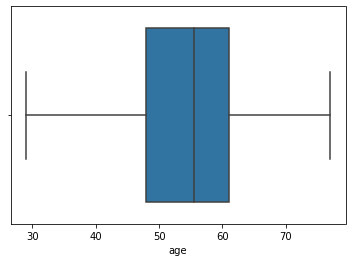

In [48]:
# Checking for outliers using the Box Plot approach

sns.boxplot(combined_data['age'])

<AxesSubplot:ylabel='Density'>

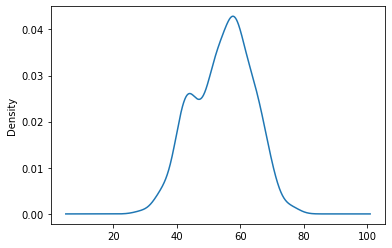

In [49]:
combined_data.age.plot(kind = 'density')

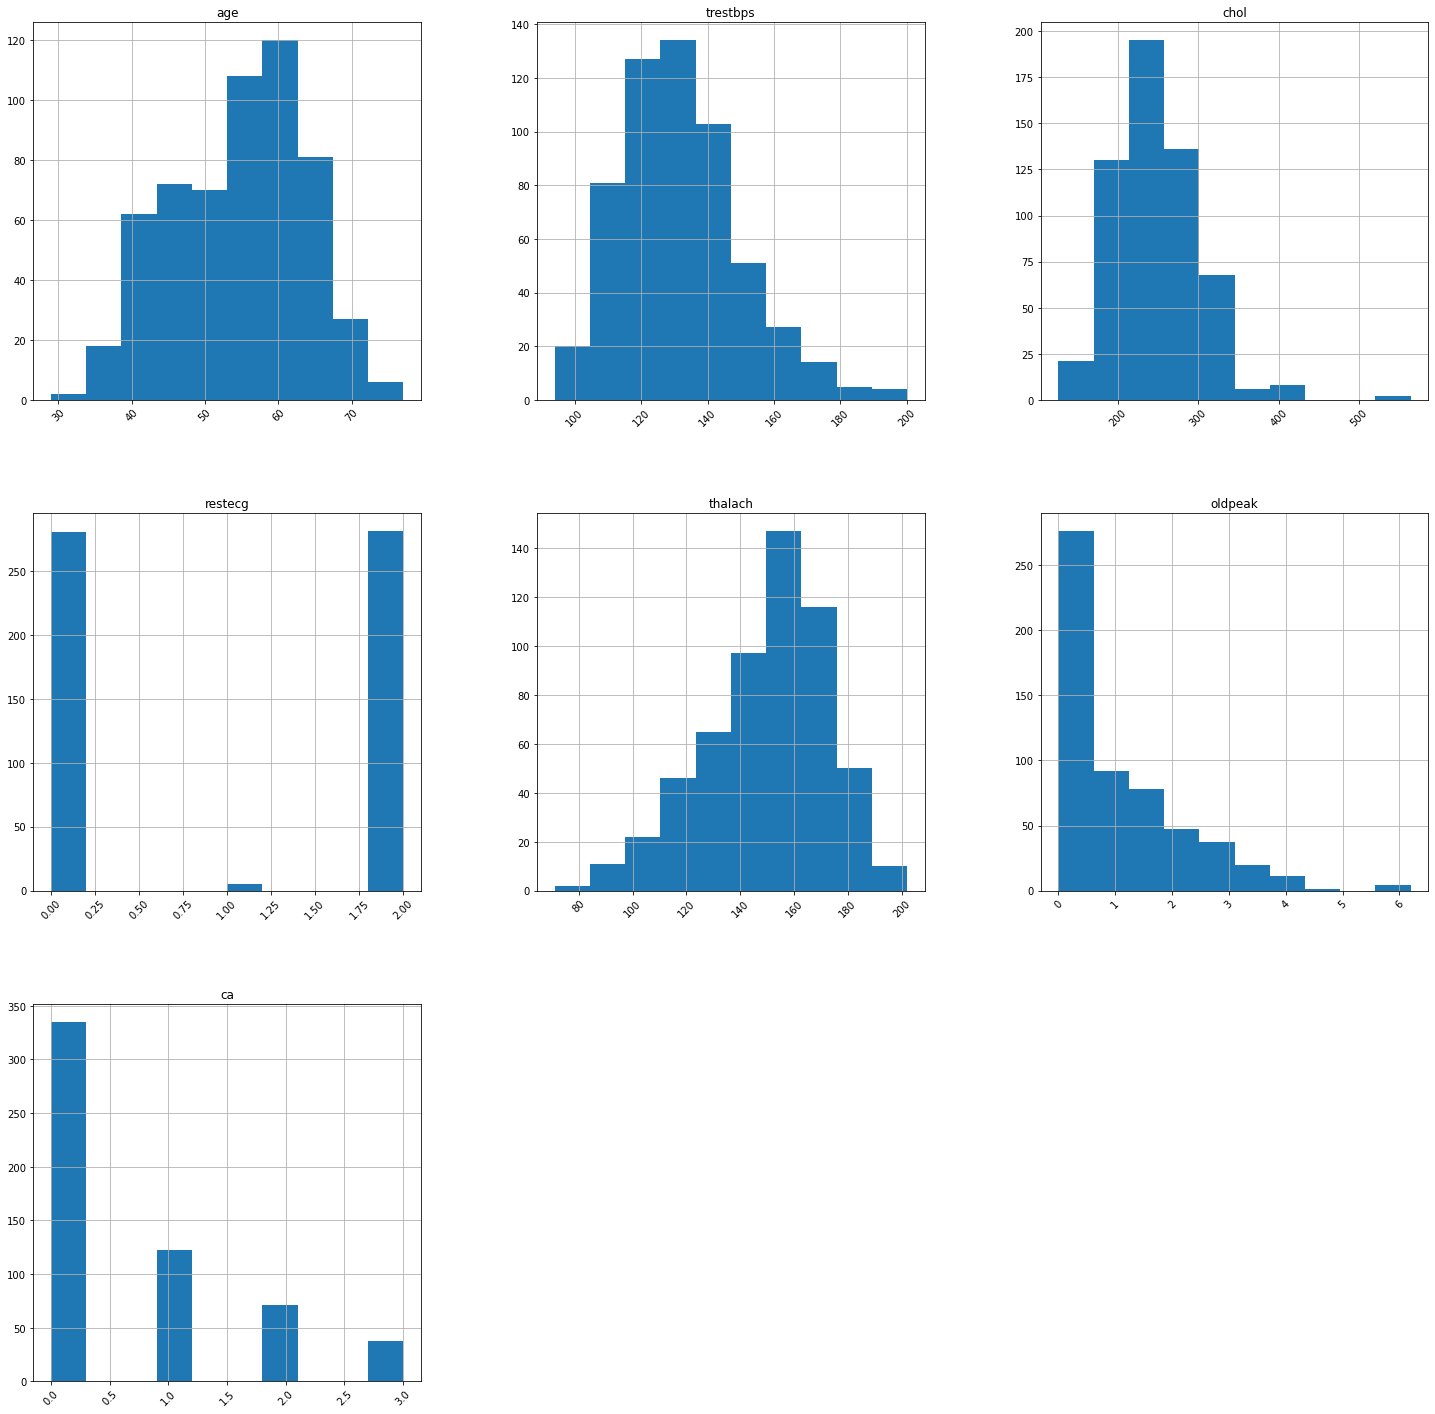

In [50]:
# Visual inspection of the distribution of data in all the features

combined_data.hist(figsize=(25, 25), xrot=45)
plt.show()

In [51]:
# Selecting a few number of columns to check outliers using the box plot 
selected_cols=['age', 'trestbps', 'chol', 'restecg', 'ca', 'thalach', 'oldpeak']
print(selected_cols)

['age', 'trestbps', 'chol', 'restecg', 'ca', 'thalach', 'oldpeak']


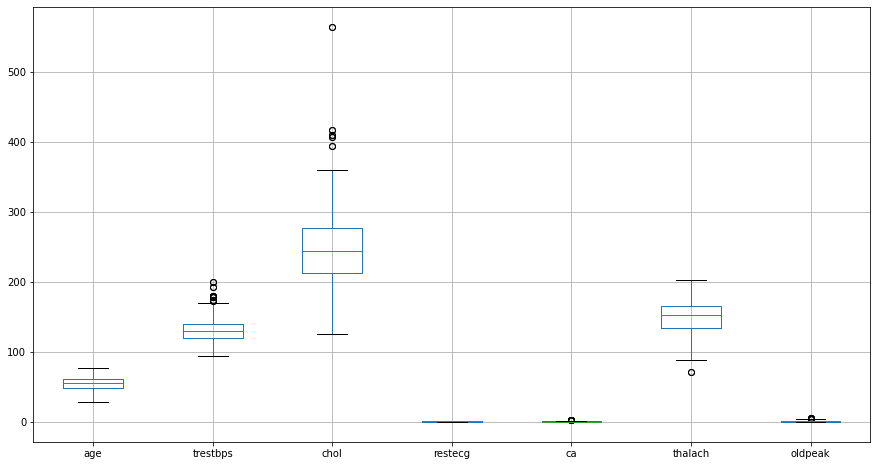

In [52]:
# Box plot for the selected columns   
plt.figure(figsize=(15,8))
combined_data.boxplot(column=list(selected_cols))
plt.show()

### Checking the Percentage of outliers 

In [53]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in selected_cols:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(combined_data[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    # Total lenght of lower/upper limits for the outliers combined 
    total_outliers = len(combined_data.loc[combined_data[col]<LL,col]) + len(combined_data.loc[combined_data[col]>UL,col]) 
    
    # Percentage of outliers 
    percent = (total_outliers / len(combined_data.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")

--------------------------------------------------
Column: age
Upper Limit = 80.5
Lower Limit = 28.5
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: trestbps
Upper Limit = 170.0
Lower Limit = 90.0
Percentage of Outliers= 3.0035335689045937
----------------------------------------------
--------------------------------------------------
Column: chol
Upper Limit = 374.5
Lower Limit = 114.5
Percentage of Outliers= 1.76678445229682
----------------------------------------------
--------------------------------------------------
Column: restecg
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: ca
Upper Limit = 2.5
Lower Limit = -1.5
Percentage of Outliers= 6.713780918727916
----------------------------------------------
--------------------------------------------------
Column: thalach
U

## Checking the skewness 

In [54]:
# Viewing the skewness level of all the float columns
combined_data.select_dtypes(include='float64').skew()  

thalach   -0.546437
oldpeak    1.268966
dtype: float64

In [55]:
# Viewing the skewness level of all the integer columns 
combined_data.select_dtypes(include='int64').skew() 

age        -0.192119
trestbps    0.701396
chol        1.148870
restecg    -0.003543
ca          1.199116
dtype: float64

### Reducing the outliers and skewness using the logarithmic transformation approach

In [56]:
# Reducing the skewness using the log transformation approach
combined_data[['age', 'trestbps', 'chol', 'restecg', 'ca', 'thalach', 'oldpeak']] = np.log1p(combined_data[['age', 'trestbps', 'chol', 'restecg', 'ca', 'thalach', 'oldpeak']])

In [57]:
# Viewing the skewness level of all the integer columns again
combined_data.select_dtypes(include='int64').skew()  

Series([], dtype: float64)

### Checking the percentage of outliers again after aplying the logarithmic transformation method

In [58]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in selected_cols:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(combined_data[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    # Total lenght of lower/upper limits for the outliers combined 
    total_outliers = len(combined_data.loc[combined_data[col]<LL,col]) + len(combined_data.loc[combined_data[col]>UL,col]) 
    
    # Percentage of outliers 
    percent = (total_outliers / len(combined_data.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("----------------------------------------------")

--------------------------------------------------
Column: age
Upper Limit = 4.480105515446789
Lower Limit = 3.5388491677089284
Percentage of Outliers= 0.35335689045936397
----------------------------------------------
--------------------------------------------------
Column: trestbps
Upper Limit = 5.178213907550309
Lower Limit = 4.566336528424601
Percentage of Outliers= 3.0035335689045937
----------------------------------------------
--------------------------------------------------
Column: chol
Upper Limit = 6.027114535662454
Lower Limit = 4.961798743737608
Percentage of Outliers= 1.5901060070671376
----------------------------------------------
--------------------------------------------------
Column: restecg
Upper Limit = 2.7465307216702746
Lower Limit = -1.6479184330021646
Percentage of Outliers= 0.0
----------------------------------------------
--------------------------------------------------
Column: ca
Upper Limit = 1.732867951399863
Lower Limit = -1.0397207708399179
Perc

### Observe that the outliers has been reduced to insignificant level using the logarithmic transformation method

## Justification: 
### This method can help in stabilizing the variance and making the data more normally distributed.


# 3. Feature Engineering Phase

### A. Discuss the potential impact of categorical variables like 'Chest pain type', 'Fasting blood sugar', and 'Thallium stress test' on predicting heart disease.

Categorical variables such as 'Chest pain type', 'Fasting blood sugar', and 'Thallium stress test' can have the following significant impact on predicting heart disease:

1. Chest Pain Type:

'Chest pain type' is a critical predictor of heart disease as it is often one of the primary symptoms of cardiovascular problems.
Different types of chest pain, such as typical angina, atypical angina, non-anginal pain, or asymptomatic, can indicate varying levels of risk for heart disease.
For instance, typical angina, characterized by chest discomfort with exertion that is relieved by rest or nitroglycerin, is strongly associated with coronary artery disease.
Including 'Chest pain type' as a predictor variable in predictive models can improve their accuracy in diagnosing heart disease.

2. Fasting Blood Sugar:

Elevated fasting blood sugar levels, indicating impaired glucose metabolism or diabetes, are associated with an increased risk of heart disease.
Diabetes is a well-established risk factor for cardiovascular disease and is associated with a higher incidence of coronary artery disease, stroke, and peripheral vascular disease.
'Fasting blood sugar' provides valuable information about the patient's metabolic health and can help identify individuals at higher risk of developing heart disease.
Incorporating 'Fasting blood sugar' as a predictor variable in predictive models allows for better risk stratification and personalized management of heart disease risk.

3. Thallium Stress Test:

The Thallium stress test, also known as myocardial perfusion imaging, is a diagnostic test used to evaluate blood flow to the heart muscle during exercise and at rest.
Abnormal results on the Thallium stress test, such as areas of reduced blood flow (ischemia) or scar tissue (infarction), indicate underlying coronary artery disease and an increased risk of heart events.
The Thallium stress test provides valuable information about the presence, severity, and extent of coronary artery disease, aiding in the diagnosis and risk stratification of heart disease.
Including the results of the Thallium stress test as a predictor variable in predictive models enhances their ability to predict the likelihood of heart disease and guide appropriate management strategies.

### B. How would you preprocess these features for modelling?

I utilised dummy variables, a widely accepted approach Similar to one-hot encoding. It ensures compatibility with algorithms, preserves information, avoids bias, enhances interpretability, and provides flexibility in handling categorical data. 

# 4. Data Visualization

## A. Visualizations to explore the relationship between age, sex, and heart disease status.

In [59]:
combined_data.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'status'],
      dtype='object')

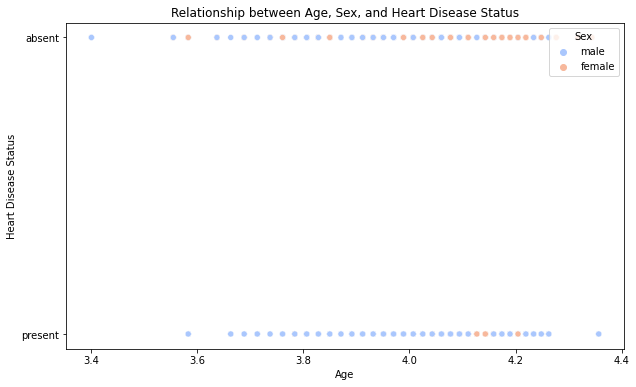

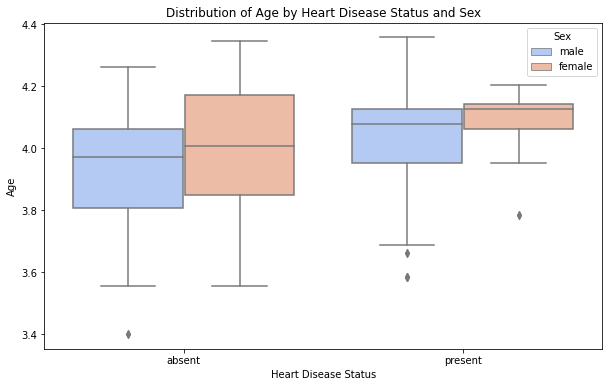

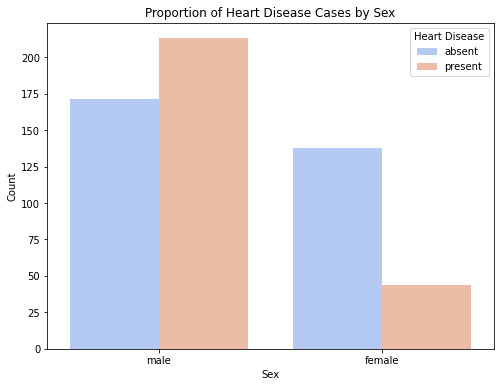

In [60]:
# Scatter plot to visualize the relationship between age and heart disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='status', hue='sex', data=combined_data, palette='coolwarm')
plt.title('Relationship between Age, Sex, and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Heart Disease Status')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Box plot to visualize the distribution of age by heart disease status and sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='age', hue='sex', data=combined_data, palette='coolwarm')
plt.title('Distribution of Age by Heart Disease Status and Sex')
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Bar plot to visualize the proportion of heart disease cases by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='status', data=combined_data, palette='coolwarm')
plt.title('Proportion of Heart Disease Cases by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


## B. What insights can you derive from these visualizations regarding the risk factors of heart disease?

From the visualizations exploring the relationship between age, sex, and heart disease status, several insights regarding the risk factors of heart disease can be derived:
1. Age, Sex and Heart Disease status:
The scatter plot shows a general trend of increasing heart disease prevalence among older individuals.
The box plot confirms that heart disease tends to be more prevalent among older individuals, as indicated by higher median ages for individuals with heart disease compared to those without.
This suggests that age is a significant risk factor for heart disease, with the risk increasing as individuals grow older.

2. Sex and Heart Disease status:
The bar plot illustrates the proportion of heart disease cases by sex.
It also reveal that there are differences in heart disease prevalence between males and females.
This suggests that sex is a risk factor for heart disease, with the male gender being more susceptible than females.

3. Interaction between Age, Sex, and Heart Disease:
The box plot and scatter plot color-coded by sex provide insights into how the relationship between age and heart disease  differ between males and females.

4. Outliers and Variability:
By examining the dispersion of data points and the presence of outliers in the visualizations, it indicate the presence of other risk factors beyond age.

# Model Development

### Encoding the categorical variables  

In [61]:
# Getting dummy variables from the categorical columns 
categorical_data = pd.get_dummies(combined_data, columns=['sex', 'fbs', 'cp', 'exang', 'slope', 'thal', 'status']) # 

In [62]:
categorical_data

,age,trestbps,chol,restecg,thalach,oldpeak,ca,sex_female,sex_male,fbs_No,...,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,thal_reversable defect,status_absent,status_present
0,4.158883,4.983607,5.455321,1.098612,5.017280,1.193922,0.000000,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,4.219508,5.081404,5.659482,1.098612,4.691348,0.916291,1.386294,0,1,1,...,1,0,1,0,0,1,0,0,0,1
2,4.219508,4.795791,5.438079,1.098612,4.867534,1.280934,1.098612,0,1,1,...,1,0,1,0,0,0,0,1,0,1
3,3.637586,4.875197,5.525453,0.000000,5.236442,1.504077,0.000000,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,3.737670,4.875197,5.323010,1.098612,5.153292,0.875469,0.000000,1,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3.970292,5.153292,5.298317,0.000000,5.093750,0.405465,0.000000,0,1,0,...,0,0,0,1,0,0,1,0,1,0
266,3.806662,4.795791,5.575949,0.000000,5.159055,0.000000,0.000000,0,1,0,...,0,0,0,1,0,0,1,0,1,0
267,4.043051,4.948760,5.686975,1.098612,5.036953,0.832909,0.000000,1,0,0,...,0,0,1,0,0,1,0,0,1,0
268,4.060443,4.948760,5.262690,0.000000,5.003946,0.336472,0.000000,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [63]:
combined_data2 = categorical_data

In [64]:
combined_data2

,age,trestbps,chol,restecg,thalach,oldpeak,ca,sex_female,sex_male,fbs_No,...,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,thal_reversable defect,status_absent,status_present
0,4.158883,4.983607,5.455321,1.098612,5.017280,1.193922,0.000000,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,4.219508,5.081404,5.659482,1.098612,4.691348,0.916291,1.386294,0,1,1,...,1,0,1,0,0,1,0,0,0,1
2,4.219508,4.795791,5.438079,1.098612,4.867534,1.280934,1.098612,0,1,1,...,1,0,1,0,0,0,0,1,0,1
3,3.637586,4.875197,5.525453,0.000000,5.236442,1.504077,0.000000,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,3.737670,4.875197,5.323010,1.098612,5.153292,0.875469,0.000000,1,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3.970292,5.153292,5.298317,0.000000,5.093750,0.405465,0.000000,0,1,0,...,0,0,0,1,0,0,1,0,1,0
266,3.806662,4.795791,5.575949,0.000000,5.159055,0.000000,0.000000,0,1,0,...,0,0,0,1,0,0,1,0,1,0
267,4.043051,4.948760,5.686975,1.098612,5.036953,0.832909,0.000000,1,0,0,...,0,0,1,0,0,1,0,0,1,0
268,4.060443,4.948760,5.262690,0.000000,5.003946,0.336472,0.000000,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [65]:
combined_data2.isna().sum()

age                        0
trestbps                   0
chol                       0
restecg                    0
thalach                    0
oldpeak                    0
ca                         0
sex_female                 0
sex_male                   0
fbs_No                     0
fbs_Yes                    0
fbs_no                     0
fbs_yes                    0
cp_asymptomatic            0
cp_atypical angina         0
cp_non-anginal pain        0
cp_typical angina          0
exang_False                0
exang_True                 0
exang_False                0
exang_True                 0
slope_downsloping          0
slope_flat                 0
slope_upsloping            0
thal_fixed defect          0
thal_normal                0
thal_reversable defect     0
thal_reversable defect     0
status_absent              0
status_present             0
dtype: int64

# 5. Choosing Algorithms

## Based on the dataset, which machine learning algorithms would you consider for predicting heart disease status and why?

Based on the dataset nature such as the number of samples, features, and the nature of the problem (which is classification). Here are some machine learning algorithms suitable for predicting the heart disease status:

1. Logistic Regression:
Logistic regression is a straightforward algorithm commonly used for binary classification tasks, making it suitable for predicting heart disease status (presence or absence). It is interpretable, computationally efficient, and can handle both linear and nonlinear relationships between features and the target variable.

2. Decision Trees:
Decision trees are versatile algorithms capable of handling both classification and regression tasks.
They are intuitive and easy to interpret, making them suitable for understanding the decision-making process in predicting heart disease status. Decision trees can capture complex interactions between features, which may be important for identifying risk factors for heart disease.

3. Random Forest:
Random Forest is an ensemble learning method that combines multiple decision trees to improve performance and robustness.
It is effective for handling high-dimensional datasets with complex relationships between features and the target variable.
Random Forest can provide feature importance scores, helping identify the most relevant predictors of heart disease status.

4. Support Vector Machines (SVM):
SVM is a powerful algorithm for classification tasks, particularly when dealing with high-dimensional data or datasets with complex decision boundaries. It works well for both linear and nonlinear classification problems by mapping input features into a higher-dimensional space. SVM can handle datasets with relatively small sample sizes and is less prone to overfitting.

5. Extreme Gradient Boosting (XGBoost):
XGBoost is an ensemble learning technique that builds multiple weak learners sequentially, each correcting the errors of its predecessor. It is highly effective for classification tasks and is known for producing state-of-the-art results in various domains. XGBoost can handle complex relationships and interactions between features, making it suitable for predicting heart disease status.

# 6. Feature Selection

### With 13 features available, how would you select the most important features for predicting heart disease?

### Description the technique used

Recursive Feature Elimination (RFE): 
This method trains a machine learning model using Logistic Regression on the dataset. It uses RFE to recursively remove the least important features and evaluate the model's performance after each removal. Then, select the subset of features that yield the best performance.

In [66]:
# Selecting features 
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # Random forest seems to be faster than logistic regression 

# loading data from half of the entire preprocessed newDF dataframe
target = combined_data2.iloc[:, -3].values 
features = combined_data2.iloc[:, :-3].values

# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values


# feature extraction
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select = 65) # 65 is very close to half of the 131 features of the preprocessed data
fit = rfe.fit(features, target)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 27
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### The feature ranking above shows that all the feturers are good for the model building 

## **Initializing empty lists to append all model's name and corresponding name**

In [67]:
Acc_Train_Data = []
model = []

Acc_Test_Data = []
f1scores = []

# **Splitting into train and test data**


In [68]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.3, random_state =42)

print(f"Train Data: {Xtrain.shape}, {Ytrain.shape}")
print(f"Test Data: {Xtest.shape}, {Ytest.shape}")

Train Data: (396, 27), (396,)
Test Data: (170, 27), (170,)


# Model Training and Evaluation

# **Logistic Regression**

LR Accuracy =:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        36

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



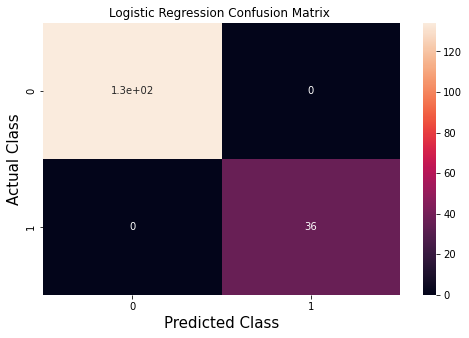

In [69]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=42)

LogReg.fit(Xtrain, Ytrain)

# Logistic Regression Accuray 
model_prediction = LogReg.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Logistic Regression')

print("LR Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Logistic Regression Confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)
plt.title("Logistic Regression Confusion Matrix ")
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

## Cross validation score (Logistic Regression)

In [70]:
score = cross_val_score(LogReg, features, target,cv=5)

score

array([1.        , 0.95575221, 1.        , 1.        , 1.        ])

In [71]:
#Print Train Accuracy
LR_train_accuracy = LogReg.score(Xtrain, Ytrain)
print("Training accuracy = ", LogReg.score(Xtrain, Ytrain))


#Print Test Accuracy
LR_test_accuracy = LogReg.score(Xtest, Ytest)
print("Testing accuracy = ", LogReg.score(Xtest, Ytest))

Training accuracy =  1.0
Testing accuracy =  1.0


# **Saving trained Logistic Regression model**

In [72]:
import pickle

LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# **Decision Tree Algorithm**


DT Accuracy =:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        36

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



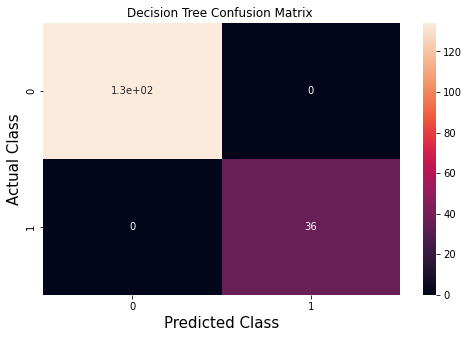

In [73]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()

DTree.fit(Xtrain, Ytrain)


# Decision Tree Accuray 
model_prediction = DTree.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Decision Tree')

print()

print("DT Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Decision Tree Confusion matrix 

plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)

plt.title("Decision Tree Confusion Matrix ")



plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

## Cross validation score (Decision Tree)


In [74]:
score = cross_val_score(DTree, features, target, cv=5)

score

array([1., 1., 1., 1., 1.])

In [75]:
#Print Train Accuracy
DT_train_accuracy = DTree.score(Xtrain, Ytrain)
print("Training accuracy = ", DTree.score(Xtrain, Ytrain))


#Print Test Accuracy
DT_test_accuracy = DTree.score(Xtest, Ytest)
print("Testing accuracy = ",DTree.score(Xtest, Ytest))

Training accuracy =  1.0
Testing accuracy =  1.0


# **Saving The Trained Decision Tree Algorithm**

In [76]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# **Random Forest**

RF Accuracy =:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        36

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



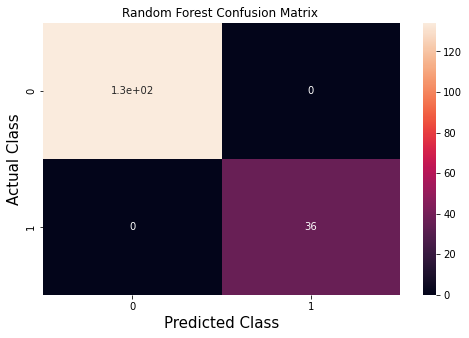

In [77]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=42)
RF.fit(Xtrain, Ytrain)

# Random Forest  Accuray 
model_prediction = RF.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('Random Forest')

print("RF Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# Random Forest Confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)
plt.title("Random Forest Confusion Matrix ")
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

## Cross validation score (Random Forest)


In [78]:
score = cross_val_score(RF, features, target,cv=5)

score

array([1.        , 0.96460177, 1.        , 1.        , 1.        ])

In [79]:
#Print Train Accuracy
RF_train_accuracy = RF.score(Xtrain, Ytrain)
print("Training accuracy = ",RF.score(Xtrain, Ytrain))


#Print Test Accuracy
RF_test_accuracy = RF.score(Xtest, Ytest)
print("Testing accuracy = ",RF.score(Xtest, Ytest))

Training accuracy =  1.0
Testing accuracy =  1.0


# **Saving trained Random Forest model**


In [80]:
import pickle

RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Support Vector Machine

SVM Accuracy =  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        36

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



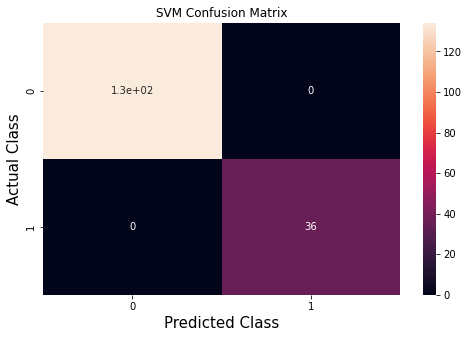

In [81]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier model
SVM = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'linear', 'rbf') based on your data

# Fit the SVM model to the training data
SVM.fit(Xtrain, Ytrain)

# SVM Accuracy
model_prediction_svm = SVM.predict(Xtest)
Accuracy_svm = metrics.accuracy_score(Ytest, model_prediction_svm)
Acc_Test_Data.append(Accuracy_svm)
model.append('SVM')

print("SVM Accuracy = ", Accuracy_svm*100)
print(classification_report(Ytest, model_prediction_svm))

# SVM Confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(Ytest, model_prediction_svm), annot=True)
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Class', fontsize=15)
plt.ylabel('Actual Class', fontsize=15)
plt.show()


## Cross validation score (SVM)


In [82]:
scores = cross_val_score(SVM, features, target, cv=5)

scores

array([1., 1., 1., 1., 1.])

In [83]:
# Print Train Accuracy
SVM_train_accuracy = SVM.score(Xtrain, Ytrain)
print("Training accuracy = ", SVM_train_accuracy)

# Print Test Accuracy
SVM_test_accuracy = SVM.score(Xtest, Ytest)
print("Testing accuracy = ", SVM_test_accuracy)


Training accuracy =  1.0
Testing accuracy =  1.0


# **Saving trained SVM model**


In [84]:
import pickle

# Specify the filename for the SVM model pickle file
SVM_pkl_filename = 'SVM_Model.pkl'

# Open the file to save as a pickle file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')

# Use pickle.dump to save the SVM model to the pickle file
pickle.dump(SVM, SVM_Model_pkl)

# Close the pickle file
SVM_Model_pkl.close()


# **XGBoost**

xgboost Accuracy =:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        36

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



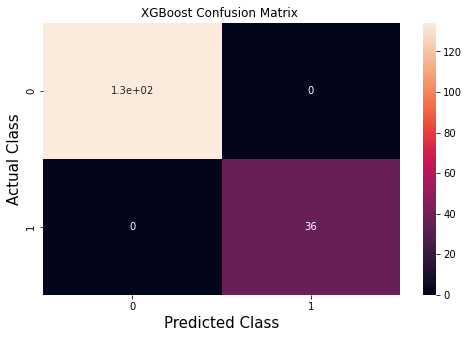

In [85]:
import xgboost as xgb

XB = xgb.XGBClassifier(random_state=42, max_depth=5)
XB.fit(Xtrain, Ytrain)


# xgboost  Accuray 
model_prediction = XB.predict(Xtest)
Accuracy = metrics.accuracy_score(Ytest, model_prediction)
Acc_Test_Data.append(Accuracy)
model.append('xgboost')

print("xgboost Accuracy =: ", Accuracy*100)
print(classification_report(Ytest, model_prediction))

# XGBoost Confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(Ytest, model_prediction), annot = True)
plt.title("XGBoost Confusion Matrix ")
plt.xlabel('Predicted Class', fontsize = 15)
plt.ylabel('Actual Class', fontsize = 15)
plt.show()

## Cross validation score (XGBoost)


In [86]:
score = cross_val_score(XB, features, target, cv=5)

score

array([1., 1., 1., 1., 1.])

In [87]:
#Print Train Accuracy
XB_train_accuracy = XB.score(Xtrain, Ytrain)
print("Training accuracy = ", XB.score(Xtrain, Ytrain))


#Print Test Accuracy
XB_test_accuracy = XB.score(Xtest, Ytest)
print("Testing accuracy = ", XB.score(Xtest, Ytest))

Training accuracy =  1.0
Testing accuracy =  1.0


# **Saving trained XGBoost model**


In [88]:
import pickle

XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# **Accuracy Comparison**


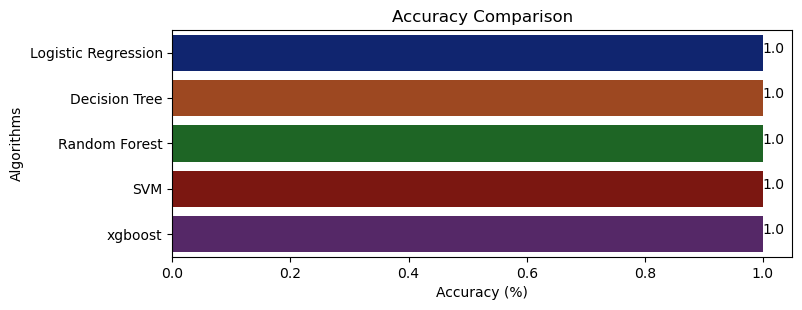

In [89]:
plt.figure(figsize=[8, 3], dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithms')
sns.barplot(x = Acc_Test_Data, y = model, palette='dark')
for index, value in enumerate(Acc_Test_Data):
    plt.text(value, index, str(round(value, 4)))

# 7. Cross-validation 

## Please explain how you would implement cross-validation in training your model and why it's important.

Cross-validation is a vital technique used in machine learning for assessing the performance and generalization capability of predictive models. It involves partitioning the dataset into multiple subsets (folds), training the model on a subset of the data, and evaluating its performance on the remaining data. Here's how you can implement cross-validation and why it's important:

1. Implementation of Cross-Validation:
K-Fold Cross-Validation: Split the dataset into 'k' equal-sized folds. Train the model 'k' times, each time using 'k-1' folds for training and the remaining fold for validation.

Stratified K-Fold Cross-Validation: Ensure that each fold contains a proportional representation of classes, especially when dealing with imbalanced datasets. This helps in obtaining reliable performance estimates across different folds.

Leave-One-Out Cross-Validation (LOOCV): Treat each data point as a separate fold. Train the model 'n' times, leaving out one data point each time for validation. This is useful for small datasets but can be computationally expensive for larger ones.

2. Importance of Cross-Validation:
Generalization Performance: Cross-validation provides a more accurate estimate of a model's performance on unseen data compared to a single train-test split. By averaging performance metrics across multiple folds, cross-validation reduces the impact of data variability and provides a more reliable assessment of the model's generalization capability.

Bias-Variance Tradeoff: Cross-validation helps in diagnosing the bias and variance of a model. If a model performs well on the training data but poorly on the validation data (high variance), it indicates overfitting. Conversely, if the model performs poorly on both training and validation data (high bias), it suggests underfitting.

Hyperparameter Tuning: Cross-validation is crucial for hyperparameter tuning. By performing grid search or random search across different hyperparameter values and evaluating their performance using cross-validation, you can identify the optimal hyperparameters that maximize the model's performance on unseen data.

Model Selection: Cross-validation facilitates model selection by comparing the performance of different models (e.g., SVM vs. Random Forest) on the same dataset. By selecting the model with the highest cross-validated performance, you can choose the most suitable model for the task at hand.

# 8. Performance Metrics

## Discuss the metrics you would use to evaluate the performance of your heart disease prediction model. Justify your choice of metrics.

When evaluating the performance of a heart disease prediction model, it's essential to choose metrics that provide insights into the model's effectiveness in correctly classifying individuals into the presence or absence of heart disease. Here are some key metrics that can be used:

1. Accuracy: Accuracy measures the proportion of correctly classified instances among all instances. It's a commonly used metric for evaluating classification models and provides an overall assessment of the model's predictive performance.

Justification: Accuracy is intuitive and easy to interpret. However, it may not be the best metric for imbalanced datasets, where one class is much more prevalent than the other (e.g., if the dataset contains significantly more instances of individuals without heart disease than those with heart disease). In such cases, accuracy alone may not provide a complete picture of the model's performance.

2. Precision and Recall: Precision measures the proportion of correctly predicted positive instances (true positives) among all instances predicted as positive. Recall (also known as sensitivity) measures the proportion of correctly predicted positive instances among all actual positive instances.

Justification: Precision and recall are crucial metrics for evaluating the performance of models in imbalanced datasets. In the context of heart disease prediction, it's important to minimize false positives (predicting someone has heart disease when they don't) and false negatives (predicting someone doesn't have heart disease when they do). Precision and recall provide insights into the trade-off between these types of errors.

3. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall and is useful when there is an imbalance between the positive and negative classes.

Justification: The F1 score is a single metric that captures the balance between precision and recall. It's particularly helpful when you want to strike a balance between minimizing false positives and false negatives.

# Model Interpretation and Deployment


## 9. Model Insights: 
### How would you interpret the model's predictions to provide insights to healthcare professionals at eHealth Africa?

Interpreting the predictions of a heart disease prediction model to provide insights to healthcare professionals at eHealth Africa involves translating the model's outputs into actionable information that can guide clinical decision-making and patient care. Here is how to interpret the model's predictions to provide valuable insights:

1. Prediction Probability Threshold: Determine an appropriate prediction probability threshold to classify individuals as either having or not having heart disease. This threshold should be chosen based on the trade-off between false positives and false negatives, considering the model's precision and recall.

2. Interpretation of Model Outputs:

i. Positive Predictions: For individuals predicted to have heart disease, provide healthcare professionals with information on the predicted probability of heart disease and the associated features contributing to the prediction. Highlight key risk factors identified by the model (e.g., age, blood pressure, cholesterol levels) and their potential implications for diagnosis and treatment.
ii. Negative Predictions: For individuals predicted not to have heart disease, emphasize the model's confidence in the negative prediction and discuss factors contributing to the absence of heart disease. However, caution healthcare professionals that false negatives are possible, and further clinical evaluation may be warranted, especially for individuals with high-risk profiles.

3. Feature Importance: Highlight the most important features identified by the model in predicting heart disease. Provide healthcare professionals with insights into which clinical variables are most influential in assessing an individual's risk of heart disease. This information can guide risk stratification, screening, and intervention strategies.

4. Individual Risk Assessment: Offer individualized risk assessments based on the model's predictions and feature importance. Provide healthcare professionals with personalized risk profiles for their patients, highlighting modifiable risk factors that can be targeted for intervention (e.g., lifestyle modifications, medication management).

5. Decision Support Tools: Develop decision support tools or clinical guidelines based on the model's predictions to assist healthcare professionals in making informed decisions about patient care. Provide recommendations for diagnostic testing, treatment options, and follow-up care tailored to individual risk profiles.

6. Continuous Monitoring and Model Evaluation: Implement systems for continuous monitoring of the model's performance and ongoing evaluation of its predictive accuracy and clinical utility. Regularly update the model based on new data and feedback from healthcare professionals to ensure its relevance and effectiveness in real-world clinical practice.

## 10.Deployment Strategy: 
### Describe a deployment strategy for your heart disease prediction model that ensures its reliability and effectiveness in a real-world healthcare.

Deploying a heart disease prediction model in a real-world healthcare setting requires careful planning and consideration to ensure its reliability, effectiveness, and seamless integration into existing clinical workflows. The deployment strategy outlining the key steps include:

1. Data Integration and Preprocessing:
Integrate the heart disease prediction model into eHealth Africa's existing healthcare IT infrastructure, Electronic Health Records (EHR) systems, or data management platforms. Develop automated data pipelines to preprocess and standardize input data from various sources, ensuring consistency and quality for model input.

2. Model Training and Validation:
Train the heart disease prediction model using comprehensive and diverse datasets representative of the target patient population. Validate the model using robust evaluation metrics and techniques, such as cross-validation and external validation on independent datasets, to assess its performance and generalization capability.

3. Model Interpretation and Explainability:
Provide healthcare professionals with tools and resources to interpret the model's predictions and understand the underlying factors contributing to each prediction. Incorporate features such as feature importance rankings, SHAP (SHapley Additive exPlanations) values, and decision rules to enhance the model's explainability and transparency.

4. Clinical Integration and Decision Support:
Integrate the heart disease prediction model into clinical decision support systems (CDSS) or electronic health record (EHR) interfaces used by healthcare professionals. Develop user-friendly interfaces and dashboards that allow clinicians to access the model's predictions, risk scores, and recommendations seamlessly within their workflow.

5. Education and Training:
Provide comprehensive training and education sessions for healthcare professionals on how to use the heart disease prediction model effectively. Offer ongoing support and resources to address any questions or concerns related to model interpretation, use, and integration into clinical practice.

6. Continuous Monitoring and Evaluation:
Implement mechanisms for continuous monitoring and evaluation of the model's performance in real-world clinical settings.
Establish feedback loops to collect user feedback, monitor model outputs, and identify areas for improvement or refinement.

7. Compliance and Privacy: 
Ensure compliance with regulatory requirements, data privacy laws (such as HIPAA), and ethical standards governing the use of patient data in healthcare. Implement robust security measures to protect patient privacy and sensitive health information throughout the deployment process.

8. Scalability and Maintenance:
Design the deployment infrastructure to be scalable, allowing for the model to handle increasing volumes of data and user requests over time. Establish procedures for model maintenance, updates, and version control to address changes in clinical guidelines, data distributions, and emerging evidence.

# Ethical Considerations

## 11. Ethical Considerations

Ethical considerations surrounding potential biases in datasets and their implications for model fairness are crucial when developing predictive models for healthcare, such as predicting heart disease. Here are some common biases that may exist in the dataset and their implications for model fairness, along with strategies to address these biases:

1. Sampling Bias:
i. Implication: Sampling bias occurs when the dataset is not representative of the target population, leading to skewed distributions of certain demographic or clinical characteristics. For example, if the dataset contains data primarily from a specific demographic group or geographic region, the model may not generalize well to other populations.
ii. Addressing Bias: To mitigate sampling bias, ensure that the dataset is collected from diverse sources and populations, representing various demographic groups, geographical regions, and healthcare settings. Use techniques such as stratified sampling or oversampling to balance representation across different groups and ensure the dataset's diversity and representativeness.

2. Label Bias:
i. Implication: Label bias arises when the labels (e.g., presence or absence of heart disease) are inaccurately or inconsistently assigned, leading to misclassification errors. Inaccurate labeling can result from human error, misdiagnosis, or subjective interpretation of medical tests.
ii. Addressing Bias: Validate the accuracy and consistency of labels through expert review, consensus, or multiple adjudicators. Incorporate quality control measures and feedback mechanisms to correct mislabeled instances and improve the reliability of the labels. Additionally, consider using probabilistic or uncertain labels to capture the uncertainty inherent in medical diagnoses.

3. Measurement Bias:
i. Implication: Measurement bias occurs when certain variables are measured or recorded differently for different groups, leading to systematic errors in data collection. For example, if diagnostic tests or screening procedures are administered unequally across demographic groups, it can introduce bias into the dataset.
ii. Addressing Bias: Standardize measurement protocols and procedures to minimize measurement bias and ensure consistency in data collection. Train healthcare professionals on standardized diagnostic criteria and guidelines to promote uniformity in clinical assessments. Conduct sensitivity analyses to assess the impact of measurement errors on model outcomes and adjust for potential biases accordingly.

4. Data Imbalance Bias:
i. Implication: Data imbalance bias arises when one class (e.g., individuals with heart disease) is significantly more prevalent than the other class, leading to biased model predictions. Imbalanced data can result in models that are biased towards the majority class, leading to poor performance for the minority class.
ii. Addressing Bias: Use techniques such as oversampling, undersampling, or synthetic data generation to balance class distributions and improve model fairness. Additionally, consider using evaluation metrics that account for class imbalance, such as precision-recall curves or F1 score, to assess model performance accurately.

5. Algorithmic Bias:
i. Implication: Algorithmic bias occurs when the model's structure or training data encode or perpetuate unfair or discriminatory patterns, leading to biased predictions. Biased algorithms can amplify existing disparities and inequalities in healthcare outcomes, resulting in unfair treatment and exacerbating health disparities.
ii. Addressing Bias: Regularly audit and monitor the model for fairness and bias using techniques such as fairness-aware machine learning algorithms, fairness metrics, and demographic parity analysis. Implement interventions such as algorithmic adjustments, feature engineering, or fairness constraints to mitigate bias and promote fairness. Additionally, involve diverse stakeholders, including ethicists, clinicians, and affected communities, in the model development process to ensure that ethical considerations and societal values are adequately addressed.

### Considering the sensitive nature of health data, what measures would you recommend to ensure the privacy and security of patient data when deploying your model?

Ensuring the privacy and security of patient data is paramount when deploying a model in healthcare, especially considering the sensitive nature of health data. Here are some measures to recommend for safeguarding patient data:

1. Data Encryption: Implement encryption mechanisms to secure data both at rest and in transit. Utilize strong encryption algorithms to protect sensitive information from unauthorized access or interception.

2. Access Control: Implement robust access control mechanisms to restrict access to patient data based on the principle of least privilege. Only authorized personnel should have access to patient records, and access permissions should be regularly reviewed and updated.

3. Anonymization and De-identification: Prior to model training and deployment, anonymize or de-identify patient data to remove personally identifiable information (PII) such as names, addresses, and social security numbers. This helps minimize the risk of re-identification and protects patient privacy.

4. Secure Data Storage: Store patient data in secure and compliant environments, such as HIPAA-compliant cloud platforms or on-premises servers with strict access controls and auditing capabilities. Implement data retention policies to ensure that data is retained only for as long as necessary and securely disposed of when no longer needed.

5. Data Minimization: Collect and retain only the minimum amount of patient data necessary for model training and evaluation. Avoid storing unnecessary or sensitive information that could pose privacy risks if breached.

6. Audit Trails and Logging: Implement audit trails and logging mechanisms to track access to patient data and monitor data usage activities. Maintain detailed records of data access, modifications, and transfers for accountability and compliance purposes.

7. Secure Model Deployment: Securely deploy the predictive model in production environments using secure protocols and authentication mechanisms. Implement secure APIs for model inference and ensure that data transmission between client applications and the model server is encrypted.

8. Regular Security Audits and Penetration Testing: Conduct regular security audits and penetration testing to identify and address vulnerabilities in the system. Test the resilience of the system against potential security threats and ensure compliance with industry standards and regulations.

9. Staff Training and Awareness: Provide comprehensive training and awareness programs for staff members involved in handling patient data. Educate employees about security best practices, privacy policies, and regulatory requirements to minimize the risk of human errors and insider threats.

10. Compliance with Regulatory Standards: Ensure compliance with relevant regulatory standards and data protection laws, such as HIPAA in the United States or GDPR in the European Union. Adhere to data privacy and security requirements specific to the jurisdiction in which the model is deployed.

### Reflect on the impact of your heart disease prediction model on patient care and healthcare delivery. How would you ensure the model's use benefits patients and supports healthcare providers in making informed decisions?

The impact of a heart disease prediction model on patient care and healthcare delivery can be significant, potentially leading to improved outcomes, more efficient resource allocation, and better-informed clinical decision-making. Below is how the model's use can benefit patients and support healthcare providers, along with strategies to ensure its positive impact:

1. Early Detection and Prevention:
The heart disease prediction model can help identify individuals at high risk of developing heart disease, enabling early intervention and preventive measures. Patients identified as high-risk can receive targeted interventions such as lifestyle modifications, medication management, and regular monitoring to reduce their risk of developing heart disease.

2. Personalized Care:
The model can provide personalized risk assessments for individual patients based on their unique demographic, clinical, and lifestyle factors. Healthcare providers can use the risk assessment to tailor treatment plans and interventions to each patient's specific needs and risk profile, optimizing patient care and outcomes.

3. Resource Allocation:
By identifying high-risk individuals, the model can help healthcare providers allocate resources more efficiently, focusing interventions and resources on those who stand to benefit the most. Resource-intensive interventions such as diagnostic tests, specialist consultations, and intensive monitoring can be prioritized for patients at high risk of heart disease.

4. Decision Support:
The model can serve as a decision support tool for healthcare providers, providing objective risk assessments and recommendations to guide clinical decision-making. Healthcare providers can use the model's predictions and risk scores to inform discussions with patients, facilitate shared decision-making, and optimize treatment plans.

5. Healthcare System Efficiency:
By facilitating early detection, preventive interventions, and targeted treatment strategies, the model can contribute to overall healthcare system efficiency and cost-effectiveness. Timely identification and management of individuals at high risk of heart disease can reduce the burden on healthcare resources, prevent costly complications, and improve long-term health outcomes. 

To ensure the model's use benefits patients and supports healthcare providers in making informed decisions, several strategies can be implemented:

1. Interdisciplinary Collaboration: Foster collaboration between data scientists, clinicians, researchers, and other stakeholders throughout the model development, validation, and deployment process. Ensure that the model reflects clinical expertise and aligns with best practices in cardiovascular care.

2. User-Centered Design: Involve end-users, including healthcare providers and patients, in the design and development of the model's interface and decision support tools. Solicit feedback to ensure that the model meets the needs of its intended users and is user-friendly and intuitive.

3. Education and Training: Provide comprehensive training and education to healthcare providers on how to use the model effectively in clinical practice. Offer continuing education programs, workshops, and support resources to ensure that healthcare providers are confident and competent in using the model to inform patient care.

4. Continuous Monitoring and Evaluation: Implement mechanisms for continuous monitoring and evaluation of the model's performance, accuracy, and clinical utility in real-world healthcare settings. Collect feedback from users, monitor clinical outcomes, and refine the model based on insights gained from ongoing evaluation efforts.

5. Ethical and Regulatory Compliance: Ensure compliance with ethical standards, data privacy regulations, and healthcare industry guidelines governing the use of predictive models in clinical practice. Prioritize patient privacy, informed consent, and transparency in model development and deployment processes.

# Making Predictions
### When the prediction result is 1 it  indicates the presence of heart disease. Otherwise the absence of heart disease is the case, since the dependent variable has been encoded from 'presence' and 'absence' to '1' and '0' respectively.

In [91]:
combined_data2 = np.array([[4.158883, 4.983607, 5.455321, 1.098612, 5.017280, 1.193922, 0.000000, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]])
prediction = DTree.predict(combined_data2)
print(prediction)

[1]
